In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(".."))

In [3]:
from src.data_loader import load_data, preprocess_data

In [21]:
ratings['user_id'] = pd.to_numeric(ratings['user_id'], errors='coerce')
ratings['item_id'] = pd.to_numeric(ratings['item_id'], errors='coerce')
ratings['rating'] = pd.to_numeric(ratings['rating'], errors='coerce')

In [22]:
ratings.dropna(subset=['user_id', 'item_id', 'rating'], inplace=True)

In [23]:
ratings = ratings[(ratings['rating'] >= 1) & (ratings['rating'] <= 5)]

In [24]:
print("✅ Ratings cleaned. Shape after cleaning:", ratings.shape)

✅ Ratings cleaned. Shape after cleaning: (100000, 4)


In [25]:
merged = pd.merge(ratings, movies[['item_id', 'title']], on='item_id')

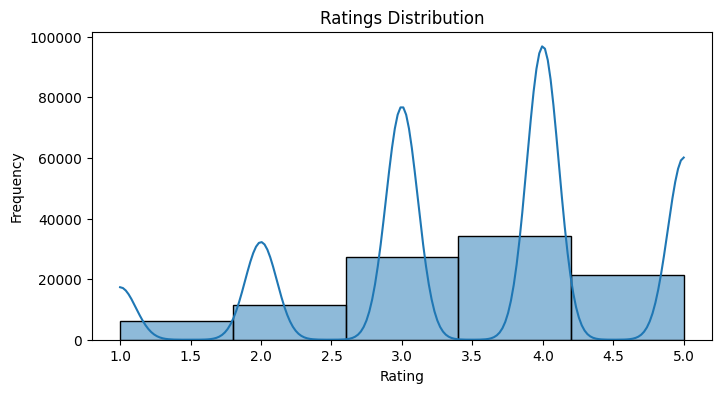

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(ratings['rating'], bins=5, kde=True)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [27]:
top_avg = merged.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print("\n🎬 Top 10 movies by average rating:\n", top_avg)


🎬 Top 10 movies by average rating:
 title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64


In [28]:
most_rated = merged['title'].value_counts().head(10)
print("\n🔥 Top 10 most rated movies:\n", most_rated)


🔥 Top 10 most rated movies:
 title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64


In [30]:
user_item_matrix = ratings.pivot_table(index='user_id', columns='item_id', values='rating')
print("\nUser-Item matrix shape:", user_item_matrix.shape)
user_item_matrix.head()


User-Item matrix shape: (943, 1682)


item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
